In [17]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from samplers import *

%matplotlib notebook
#%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## QNN

### Fitting Gaussian

In [20]:
np.random.seed(43)
backend = Aer.get_backend('qasm_simulator')

layer1 = QLayer(n_qubits=1, 
                n_features=1, 
                n_targets=3, 
                encoder=Encoder(), 
                ansatz=Ansatz(blocks=["entangle", "ry"]), 
                sampler=Parity(), 
                scale=[-np.pi, np.pi], 
                backend=backend, 
                shots=100)

layer2 = QLayer(n_qubits=3, 
                n_features=3, 
                n_targets=1, 
                encoder=Encoder(), 
                ansatz=Ansatz(blocks=["entangle", "ry"], reps=2), 
                sampler=Parity(),
                scale=1, 
                backend=backend, 
                shots=100)


layers = [layer1, layer2]

optimizer = Adam(lr=0.1)
network = NeuralNetwork(layers)

<IPython.core.display.Javascript object>


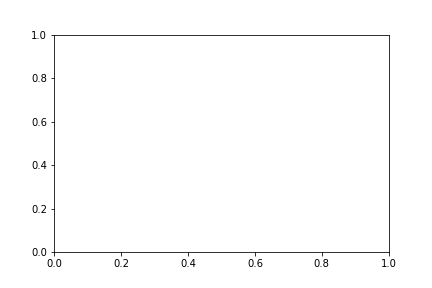

QiskitError: 'ERROR:  [Experiment 0] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 1] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 2] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 3] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 4] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 5] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 6] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 7] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 8] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 9] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 10] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 11] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 12] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 13] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 14] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 15] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 16] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 17] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 18] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 19] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 20] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 21] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 22] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 23] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 24] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 25] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 26] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 27] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 28] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 29] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 30] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 31] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 32] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 33] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 34] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 35] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 36] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 37] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 38] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 39] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 40] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 41] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 42] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 43] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 44] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 45] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 46] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 47] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 48] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 49] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 50] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 51] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 52] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 53] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 54] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 55] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 56] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 57] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 58] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 59] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 60] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 61] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 62] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 63] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 64] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 65] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 66] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 67] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 68] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 69] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 70] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 71] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 72] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 73] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 74] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 75] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 76] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 77] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 78] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 79] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 80] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 81] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 82] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 83] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 84] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 85] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 86] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 87] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 88] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 89] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 90] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 91] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 92] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 93] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 94] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 95] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 96] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 97] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 98] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 99] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 100] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 101] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 102] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 103] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 104] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 105] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 106] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 107] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 108] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 109] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 110] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 111] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 112] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 113] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 114] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 115] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 116] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 117] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 118] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 119] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 120] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 121] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 122] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 123] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 124] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 125] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 126] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 127] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 128] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 129] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 130] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 131] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 132] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 133] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 134] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 135] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 136] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 137] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 138] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 139] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 140] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 141] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 142] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 143] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 144] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 145] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 146] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 147] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 148] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 149] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 150] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 151] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 152] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 153] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 154] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 155] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 156] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 157] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 158] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 159] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 160] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 161] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 162] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 163] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 164] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 165] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 166] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 167] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 168] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 169] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 170] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 171] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 172] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 173] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 174] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 175] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 176] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 177] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 178] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 179] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 180] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 181] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 182] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 183] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 184] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 185] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 186] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 187] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 188] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 189] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 190] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 191] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 192] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 193] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 194] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 195] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 196] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 197] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 198] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 199] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 200] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 201] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 202] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 203] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 204] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 205] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 206] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 207] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 208] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 209] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 210] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 211] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 212] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 213] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 214] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 215] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 216] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 217] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 218] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 219] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 220] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 221] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 222] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 223] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 224] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 225] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 226] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 227] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 228] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 229] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 230] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 231] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 232] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 233] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 234] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 235] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 236] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 237] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 238] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 239] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 240] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 241] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 242] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 243] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 244] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 245] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 246] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 247] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 248] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 249] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 250] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 251] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 252] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 253] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 254] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 255] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 256] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 257] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 258] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 259] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 260] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 261] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 262] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 263] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 264] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 265] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 266] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 267] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 268] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 269] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 270] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 271] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 272] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 273] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 274] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 275] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 276] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 277] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 278] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 279] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 280] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 281] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 282] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 283] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 284] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 285] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 286] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 287] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 288] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 289] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 290] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 291] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 292] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 293] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 294] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 295] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 296] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 297] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 298] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method [Experiment 299] Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method ,  ERROR: Circuit contains invalid instructions {"gates": {ry}} for "density_matrix" method'

In [22]:
x = np.linspace(0, np.pi, 100).reshape(-1,1)
y = 0.9*np.exp(-3*(x-np.pi/2)**2) + 0.05

x = scaler(x, a=-np.pi/2, b=np.pi/2)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()


for i in tqdm(range(100)):
    network.backward(x, y)
    network.step()
    y_pred = network.predict(x)
    
    ax.clear()
    ax.plot(x, y)
    ax.plot(x, y_pred)
    ax.set_ylim([0, 1])
    fig.canvas.draw()

### Derivative

In [23]:
y_pred = network.predict(x)
deriv = network.deriv(x)

In [24]:
y_deriv_num = (y[1:] - y[:-1])/(x[1]-x[0])

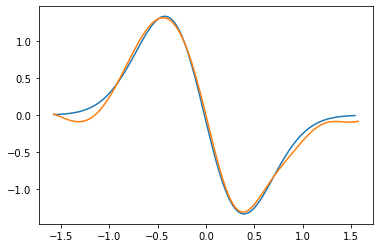

In [25]:
#plt.plot(x,y)
#plt.plot(x,y_pred)
plt.plot(x[:-1], y_deriv_num)
plt.plot(x, deriv)
plt.show()

### Sequential

In [ ]:
np.random.seed(42)
network = sequential_qnn(q_bits = [1, 3, 3],
                         dim = [1, 3, 3, 1],
                         reps=1,
                         backend = backend,
                         shots = 10000)

In [ ]:
x = np.linspace(0, np.pi, 21).reshape(-1,1)
y = 0.9*np.exp(-3*(x-np.pi/2)**2) + 0.05

#network.train(x, y, epochs=100, verbose=True)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()


for i in tqdm(range(100)):
    network.backward(x, y)
    network.step()
    y_pred = network.predict(x)
    
    ax.clear()
    ax.plot(x, y)
    ax.plot(x, y_pred)
    ax.set_ylim([0, 1])
    fig.canvas.draw()

#### Chaotic

In [ ]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

layer1 = QLayer(n_qubits=1, n_features=1, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=2000)
layer2 = QLayer(n_qubits=3, n_features=3, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=np.pi, backend=backend, shots=2000)
layer3 = QLayer(n_qubits=3, n_features=3, n_targets=1, encoder=Encoder(), ansatz=Ansatz(), reps=1, scale=1, backend=backend, shots=2000)


layers = [layer1, layer2, layer3]

optimizer = Adam(lr=0.01)
network = NeuralNetwork(layers, optimizer)

In [ ]:
np.random.seed(42)
x = np.linspace(0, 1, 10).reshape(-1,1)
y = np.random.uniform(0, 1, 10).reshape(-1,1)

network.backward(x, y)


fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()



for i in tqdm(range(100)):
    
    y_pred = network.predict(x)
    
    network.backward(x, y)
    network.step()
    ax.clear()
    ax.plot(x, y)
    ax.plot(x, y_pred)
    ax.set_ylim([0, 1])
    fig.canvas.draw()

#### Sigmoid

In [ ]:
np.random.seed(42)
x = np.random.uniform(0, np.pi/2, (20, 3))
beta = np.array([1,1,1]).reshape(-1,1)

z = (x-np.pi/4)@beta
y = 1/(1+np.exp(-2*z))


plt.plot(z, y, "o")
plt.show()

In [ ]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

model = sequential_qnn(q_bits = [3],
                     dim = [3, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

model.train(x, y, epochs=50, verbose=True)

In [ ]:
y_pred = model.predict(x)

In [ ]:
plt.plot(z, y, "o")
plt.plot(z, y_pred, "o")
plt.show()

#### ReLu

In [ ]:
np.random.seed(42)
x = np.random.uniform(0, np.pi/2, (20, 3))
beta = np.array([1/3,-2/3,1/3]).reshape(-1,1)
z = x@beta
y = z*(0<z).astype(float)+0.1

#plt.plot(z, y, "o")
#plt.show()

In [ ]:
np.random.seed(39)
backend = Aer.get_backend('qasm_simulator')

layer1 = QLayer(n_qubits=3, n_inputs=3, n_outputs=1, encoder=Encoder(), ansatz=Ansatz(), reps=3, scale=1, backend=backend, shots=1000)
layers = [layer1]

optimizer = Adam(lr=0.01)
network = QNN(layers, optimizer)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()


for i in tqdm(range(200)):
    network.backward(x, y)

    y_pred = []
    for x_ in x:
        network(x_)
        y_pred.append(network.a[-1])
    
    network.step()
    
    ax.clear()
    ax.plot(z, y, "o")
    ax.plot(z, y_pred, "o")
    ax.set_ylim([0, 1])
    fig.canvas.draw()

#### Radial Basis

In [ ]:
np.random.seed(42)
x = np.random.uniform(0, np.pi/2, (20, 3))
beta = np.array([1/3,-2/3,1/3]).reshape(-1,1)
z = x@beta
y = 0.8*np.exp(-(z**2)/0.1) + 0.1

plt.plot(z, y, "o")
plt.show()

In [ ]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

model = sequential_qnn(q_bits = [3],
                     dim = [3, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

model.train(x, y, epochs=100, verbose=True)

In [ ]:
y_pred = model.predict(x)

In [ ]:
plt.plot(z, y, "o")
plt.plot(z, y_pred, "o")
plt.show()

#### Classical NN

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.layer1 = nn.Linear(3, 2)
        self.layer2 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = self.layer2(x)
        return x

In [ ]:
np.random.seed(42)
x = np.random.uniform(0, np.pi/2, (20, 3))
beta = np.array([1/3,-2/3,1/3]).reshape(-1,1)
#z = (x-np.pi/4)@beta

z = x@beta
#y = 1/(1+np.exp(-3*z))

y = 0.8*np.exp(-(z**2)/0.1) + 0.1
#y = z*(0<z).astype(float)+0.1


x = torch.tensor(x, dtype = torch.float, requires_grad=False)
y = torch.tensor(y, dtype = torch.float, requires_grad=False)

model = Model()
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in tqdm(range(200)):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_func(y_pred, y)
    loss.backward()
    print(loss.detach())
    optimizer.step()
    
    ax.clear()
    ax.plot(z, y.detach(), "o")
    ax.plot(z, y_pred.detach(), "o")
    ax.set_ylim([-0.2, 1.2])
    fig.canvas.draw()

#### Ost

In [ ]:
np.random.seed(42)
backend = Aer.get_backend('qasm_simulator')

layer1 = CLayer(n_inputs=1, n_outputs=3, scale = 1, activation = torch.tanh)
layer2 = CLayer(n_inputs=3, n_outputs=1, scale = 1, activation = torch.tanh)
layers = [layer1, layer2]

optimizer = Adam(lr=0.01)
network = QNN(layers, optimizer)

In [ ]:
x = np.linspace(0, 1, 10).reshape(-1,1)
y = 0.9*np.exp(-10*(x-0.5)**2)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

for i in tqdm(range(100)):
    network.backward(x, y)

    y_pred = []
    for x_ in x:
        network(x_)
        y_pred.append(network.a[-1])
    
    network.step()
    ax.clear()
    ax.plot(x, y)
    ax.plot(x, y_pred)
    ax.set_ylim([0, 1])
    fig.canvas.draw()

In [ ]:
x = np.linspace(-np.pi/2, np.pi/2, 30)

x = generate_meshgrid([x,x])

In [ ]:
print(x.shape)

In [ ]:
np.random.seed(44)
backend = Aer.get_backend('qasm_simulator')

qkn1 = sequential_qnn(n_qubits = [2],
                         dim = [2, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         backend = backend,
                         shots = 10000)

qkn2 = sequential_qnn(n_qubits = [2, 4],
                         dim = [2, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         backend = backend,
                         shots = 10000)

qkn3 = sequential_qnn(n_qubits = [2, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder = Encoder(),
                         sampler = Parity(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         backend = backend,
                         shots = 10000)

qkn4 = sequential_qnn(n_qubits = [2, 4, 4, 4],
                         dim = [2, 4, 4, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         backend = backend,
                         shots = 10000)

In [ ]:
y_pred1 = qkn1.predict(x).reshape(30,30)
y_pred2 = qkn2.predict(x).reshape(30,30)
y_pred3 = qkn3.predict(x).reshape(30,30)
y_pred4 = qkn4.predict(x).reshape(30,30)

In [ ]:
plt.imshow(y_pred1)
plt.colorbar()
plt.show()

plt.imshow(y_pred2)
plt.colorbar()
plt.show()

plt.imshow(y_pred3)
plt.colorbar()
plt.show()

plt.imshow(y_pred4)
plt.colorbar()
plt.show()

In [ ]:
np.random.seed(43)

dnn1 = sequential_dnn(dim = [2, 1],)
dnn2 = sequential_dnn(dim = [2, 6, 1])
dnn3 = sequential_dnn(dim = [2, 6, 6, 1])
dnn4 = sequential_dnn(dim = [2, 6, 6, 6, 1])

In [ ]:
x = scaler(x, mode="standard")

In [ ]:
y_pred5 = dnn1.predict(x).reshape(30,30)
y_pred6 = dnn2.predict(x).reshape(30,30)
y_pred7 = dnn3.predict(x).reshape(30,30)
y_pred8 = dnn4.predict(x).reshape(30,30)

In [ ]:
plt.imshow(y_pred5)
plt.colorbar()
plt.show()

plt.imshow(y_pred6)
plt.colorbar()
plt.show()

plt.imshow(y_pred7)
plt.colorbar()
plt.show()

plt.imshow(y_pred8)
plt.colorbar()
plt.show()